<a href="https://colab.research.google.com/github/RupaliGarg0906/Learn_AI_ML/blob/master/SVHN_Dataset_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import h5py
h5=h5py.File('/content/drive/My Drive/DataScience/SVHN_single_grey1.h5','r')

In [32]:
#Import Required Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
from tensorflow.keras import initializers
from keras.layers import Dense,Input
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.layers import BatchNormalization,Activation,Flatten,Dropout

In [6]:
X_Train=h5['X_train'][:]
X_Test=h5['X_test'][:]
Y_Train=h5['y_train'][:]
Y_Test=h5['y_test'][:]
print('Shape of X_Train',X_Train.shape)
print('Shape of X_Test',X_Test.shape)
print('Shape of Y_Train',Y_Train.shape)
print('Shape of Y_Test',Y_Test.shape)
h5.close()

Shape of X_Train (42000, 32, 32)
Shape of X_Test (18000, 32, 32)
Shape of Y_Train (42000,)
Shape of Y_Test (18000,)


In [7]:
#Function to crop the image
def crop_center (X):
  p,q,r=X.shape
  dummy= np.zeros((p,q,r),dtype=X.dtype)
  for i in range(0,p-1):
    cropped_img=X[i,:,8:25] 
    dummy[i,:,8:25]=cropped_img
  return dummy

In [8]:
#Crop Centre part from the image and Set all other pixels to 0
X_Train_original=X_Train
X_Test_original=X_Test
X_Train=crop_center(X_Train)
X_Test=crop_center(X_Test)

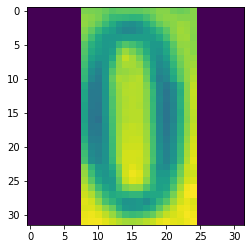

In [9]:
#Reshape the image to flatten it
X_Train_r=np.reshape(X_Train,(42000,1024))
X_Test_r=np.reshape(X_Test,(18000,1024))
Y_Train_r=np.reshape(Y_Train,(-1,1))
Y_Test_r=np.reshape(Y_Test,(-1,1))
print('Shape of X_Train after reshaping', X_Train_r.shape)
print("print ist record {0} and its label {1}".format(X_Train_r[0],Y_Train_r[0]))

Shape of X_Train after reshaping (42000, 1024)
print ist record [0. 0. 0. ... 0. 0. 0.] and its label [2]


In [10]:
print(Y_Train_r.shape)

(42000, 1)


In [11]:
#Function to convert into categorical variable
def inputs_encode(y_Train,y_Test):
  Y_Train_encod = to_categorical(y_Train)
  Y_Test_encod = to_categorical(y_Test)
  #encod=to_categorical()
  # encod.fit(y_Train)
  #Y_Train_encod=encod.transform(y_Train)
  # Y_Test_encod=encod.transform(y_Test)
  return (Y_Train_encod,Y_Test_encod)

In [12]:
Y_Train_encod,Y_Test_encod=inputs_encode(Y_Train_r,Y_Test_r)

(42000, 10) is the shape of Y_Train_encod after reshaping
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


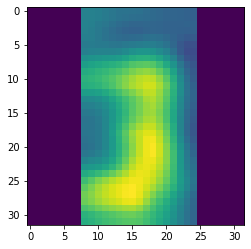

In [13]:
print("{0} is the shape of Y_Train_encod after reshaping".format(Y_Train_encod.shape))
plt.imshow(X_Train[55])
print(Y_Train_encod[55])

In [14]:
#normalize the data
X_Train_r=X_Train_r/255
Y_Test_r=Y_Test_r/255

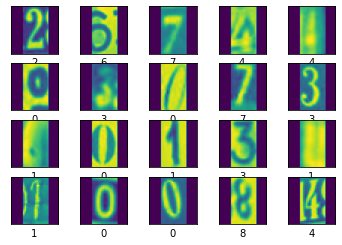

In [44]:
#Just go through some images and its label to verify images are correctly labelled
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train[i])
  plt.xlabel(Y_Train[i])

Text(0.5, 0.1, 'Original Image Vs Cropped image')

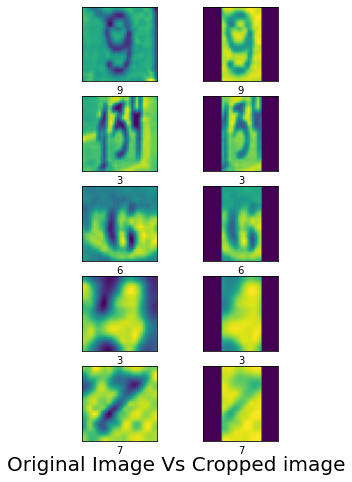

In [45]:
#Check original and its corresponding cropped image
fig=plt.figure(figsize=(4, 8))

rows=5
columns=2
for i in range(1,rows*columns+1,2):
  n=random.randint(0,420)
  m=random.randint(0,100)
  fig.add_subplot(rows, columns, i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train_original[n*m])
  plt.xlabel(Y_Train[n*m])
  fig.add_subplot(rows, columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train[n*m])
  plt.xlabel(Y_Train[n*m])
fig.suptitle('Original Image Vs Cropped image',fontsize=20,y=0.1)

    #plt.imshow(X_Train_Original[i])






In [47]:
#Create Neural network 
model=Sequential()
#model.add(Input(shape=(32,32 ),sparse=False))
model.add(Input(shape=(1024,)))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(10,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_Train_r,Y_Train_encod,epochs=15,batch_size=50)

Epoch 1/15
840/840 [==============================] - 2s 3ms/step - loss: 0.2701 - accuracy: 0.3578
Epoch 2/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1907 - accuracy: 0.6141
Epoch 3/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1719 - accuracy: 0.6537
Epoch 4/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1615 - accuracy: 0.6786
Epoch 5/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.6973
Epoch 6/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1484 - accuracy: 0.7079
Epoch 7/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1433 - accuracy: 0.7195
Epoch 8/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1383 - accuracy: 0.7312
Epoch 9/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1348 - accuracy: 0.7362
Epoch 10/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1312 - accuracy: 0.7449

In [48]:
results = model.evaluate(X_Test_r, Y_Test_encod)
print(results[1])

563/563 [==============================] - 1s 1ms/step - loss: 0.7161 - accuracy: 0.7615
0.7615000009536743


Original value is 9
Predicted value is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


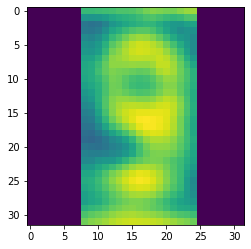

In [68]:
#Check original vs presicted value
prediction=model.predict(X_Test_r)
n=random.randint(0,18000)
print("Original value is",Y_Test[n])
print("Predicted value is",prediction[n])

plt.imshow(X_Test[n])
